In [116]:
import pandas as pd
import numpy as np
import itertools

In [117]:
pd.set_option('display.max_columns', None)

In [118]:
df = pd.read_csv('deadlock_matches_raw.csv')
df

,matchid,duration,winner,hero_1_A,nickname_1_A,lane_1_A,kills_1_A,deaths_1_A,assists_1_A,souls_1_A,SPM_1_A,last_hits_1_A,denies_1_A,level_1_A,hero_2_A,nickname_2_A,lane_2_A,kills_2_A,deaths_2_A,assists_2_A,souls_2_A,SPM_2_A,last_hits_2_A,denies_2_A,level_2_A,hero_3_A,nickname_3_A,lane_3_A,kills_3_A,deaths_3_A,assists_3_A,souls_3_A,SPM_3_A,last_hits_3_A,denies_3_A,level_3_A,hero_4_A,nickname_4_A,lane_4_A,kills_4_A,deaths_4_A,assists_4_A,souls_4_A,SPM_4_A,last_hits_4_A,denies_4_A,level_4_A,hero_5_A,nickname_5_A,lane_5_A,kills_5_A,deaths_5_A,assists_5_A,souls_5_A,SPM_5_A,last_hits_5_A,denies_5_A,level_5_A,hero_6_A,nickname_6_A,lane_6_A,kills_6_A,deaths_6_A,assists_6_A,souls_6_A,SPM_6_A,last_hits_6_A,denies_6_A,level_6_A,hero_1_B,nickname_1_B,lane_1_B,kills_1_B,deaths_1_B,assists_1_B,souls_1_B,SPM_1_B,last_hits_1_B,denies_1_B,level_1_B,hero_2_B,nickname_2_B,lane_2_B,kills_2_B,deaths_2_B,assists_2_B,souls_2_B,SPM_2_B,last_hits_2_B,denies_2_B,level_2_B,hero_3_B,nickname_3_B,lane_3_B,kills_3_B,deaths_3_B,assists_3_B,souls_3_B,SPM_3_B,last_hits_3_B,denies_3_B,level_3_B,hero_4_B,nickname_4_B,lane_4_B,kills_4_B,deaths_4_B,assists_4_B,souls_4_B,SPM_4_B,last_hits_4_B,denies_4_B,level_4_B,hero_5_B,nickname_5_B,lane_5_B,kills_5_B,deaths_5_B,assists_5_B,souls_5_B,SPM_5_B,last_hits_5_B,denies_5_B,level_5_B,hero_6_B,nickname_6_B,lane_6_B,kills_6_B,deaths_6_B,assists_6_B,souls_6_B,SPM_6_B,last_hits_6_B,denies_6_B,level_6_B
0,6425000,32:22,The Sapphire Flame,Infernus,Ship,Left,1,10,11,28367,876.43,192,7,26,Lady Geist,Coochienetta,Mid Right,1,8,5,28364,876.33,179,5,26,Kelvin,china number 1,Right,11,9,11,29614,914.95,106,29,26,Lash,datboitwix,Right,9,12,8,31081,960.28,177,3,27,Seven,Presence,Right,9,8,9,39566,1222.43,204,11,30,Yamato,Quans,Right,16,9,5,38246,1181.65,160,3,29,Haze,LimeSalt,Left,12,9,12,38440,1187.64,151,13,29,Pocket,Tyler,Mid Right,5,7,11,34871,1077.37,224,11,28,McGinnis,onions,Right,12,11,11,33324,1029.58,131,1,28,Vindicta,condurr,Right,11,8,14,39391,1217.02,151,14,30,Ivy,SeSqMagikarp,Right,5,5,19,38973,1204.11,173,9,29,Shiv,Smevz,Right,11,7,10,37361,1154.30,166,7,29
1,6425001,29:58,The Sapphire Flame,Paradox,899670138,Left,5,6,10,27900,931.03,139,5,26,Haze,378168164,Left,12,5,6,38887,1297.68,130,17,29,Infernus,Quantumofire,Mid Right,5,6,11,34852,1163.03,136,22,28,Abrams,Faceless,Mid Right,6,10,7,23865,796.38,100,4,24,Wraith,Snade,Right,2,9,4,30706,1024.67,208,8,27,Vindicta,Sigma Xi,Right,6,7,7,27658,922.96,132,15,26,Ivy,taunty,Left,4,4,8,31441,1049.20,137,30,27,Kelvin,Crazem,Left,2,9,10,30629,1022.10,170,14,27,Grey Talon,reeceisbetter,Mid Right,9,8,6,29475,983.59,99,4,26,Yamato,unlimited,Mid Right,10,7,8,36684,1224.16,125,9,29,Seven,psich1c,Right,13,4,12,43799,1461.59,257,8,31,Lash,Percocet Pete,Right,5,5,4,32310,1078.20,215,26,27
2,6425003,29:57,The Amber Hand,Bebop,Oh Wonder,Left,6,4,11,30301,1011.72,144,16,27,Haze,atheia,Mid Right,12,8,9,33697,1125.11,159,9,28,Abrams,D A Y [ 9 ],Right,10,5,17,37797,1262.00,142,31,29,Warden,Da Law,Right,6,9,7,28532,952.65,154,5,26,Mo & Krill,et,Right,13,2,16,41834,1396.79,206,20,30,Shiv,Eroot,Right,3,11,10,22061,736.59,54,2,24,Paradox,sh0ᴎ,Left,2,8,15,21742,725.94,90,7,23,Wraith,|AΩ| BuffGoff1,Mid Right,8,12,9,31866,1063.97,163,4,27,Vindicta,Panzair,Right,4,7,11,28483,951.02,123,6,26,Kelvin,Tettrum,Right,7,8,14,26857,896.73,142,8,25,Lash,Bronan,Right,9,8,14,27972,933.96,92,2,26,Seven,ZYPHERUS,Right,9,7,14,27291,911.22,133,8,26
3,6425004,53:57,The Amber Hand,McGinnis,Skelni,Left,8,10,28,63551,1177.96,312,18,33,Grey Talon,Throbgoblin,Left,5,8,19,39983,741.11,102,2,30,Seven,ArrogantLobster,Mid Right,22,7,28,78278,1450.94,410,7,33,Shiv,redzhgaming,Right,26,12,28,63363,1174.48,290,4,33,Dynamo,Pants,Right,4,10,36,48625,901.30,134,2,33,Haze,106467267,Right,16,10,33,67808,1256.87,316,23,33,Lash,Icy Inferno,Left,7,15,19,53792,997.07,244,36,33,Abrams,intel,Left,9,14,22,59337,1099.85,270,2,33,Mo & Krill,limit testing,Mid Right,8,12,16,60280,1117.33,300,15,33,Warden,NF,Right,6,19,17,45986,852.38,188,15,32,

In [119]:
df.isna().sum()

matchid          0
duration         0
winner           0
hero_1_A         0
nickname_1_A     0
                ..
souls_6_B        0
SPM_6_B          0
last_hits_6_B    0
denies_6_B       0
level_6_B        0
Length: 135, dtype: int64

In [120]:
df.duplicated().sum()

0

In [121]:
df['winner'] = df['winner'].apply(lambda x: 0 if x == 'The Amber Hand' else 1)
df

,matchid,duration,winner,hero_1_A,nickname_1_A,lane_1_A,kills_1_A,deaths_1_A,assists_1_A,souls_1_A,SPM_1_A,last_hits_1_A,denies_1_A,level_1_A,hero_2_A,nickname_2_A,lane_2_A,kills_2_A,deaths_2_A,assists_2_A,souls_2_A,SPM_2_A,last_hits_2_A,denies_2_A,level_2_A,hero_3_A,nickname_3_A,lane_3_A,kills_3_A,deaths_3_A,assists_3_A,souls_3_A,SPM_3_A,last_hits_3_A,denies_3_A,level_3_A,hero_4_A,nickname_4_A,lane_4_A,kills_4_A,deaths_4_A,assists_4_A,souls_4_A,SPM_4_A,last_hits_4_A,denies_4_A,level_4_A,hero_5_A,nickname_5_A,lane_5_A,kills_5_A,deaths_5_A,assists_5_A,souls_5_A,SPM_5_A,last_hits_5_A,denies_5_A,level_5_A,hero_6_A,nickname_6_A,lane_6_A,kills_6_A,deaths_6_A,assists_6_A,souls_6_A,SPM_6_A,last_hits_6_A,denies_6_A,level_6_A,hero_1_B,nickname_1_B,lane_1_B,kills_1_B,deaths_1_B,assists_1_B,souls_1_B,SPM_1_B,last_hits_1_B,denies_1_B,level_1_B,hero_2_B,nickname_2_B,lane_2_B,kills_2_B,deaths_2_B,assists_2_B,souls_2_B,SPM_2_B,last_hits_2_B,denies_2_B,level_2_B,hero_3_B,nickname_3_B,lane_3_B,kills_3_B,deaths_3_B,assists_3_B,souls_3_B,SPM_3_B,last_hits_3_B,denies_3_B,level_3_B,hero_4_B,nickname_4_B,lane_4_B,kills_4_B,deaths_4_B,assists_4_B,souls_4_B,SPM_4_B,last_hits_4_B,denies_4_B,level_4_B,hero_5_B,nickname_5_B,lane_5_B,kills_5_B,deaths_5_B,assists_5_B,souls_5_B,SPM_5_B,last_hits_5_B,denies_5_B,level_5_B,hero_6_B,nickname_6_B,lane_6_B,kills_6_B,deaths_6_B,assists_6_B,souls_6_B,SPM_6_B,last_hits_6_B,denies_6_B,level_6_B
0,6425000,32:22,1,Infernus,Ship,Left,1,10,11,28367,876.43,192,7,26,Lady Geist,Coochienetta,Mid Right,1,8,5,28364,876.33,179,5,26,Kelvin,china number 1,Right,11,9,11,29614,914.95,106,29,26,Lash,datboitwix,Right,9,12,8,31081,960.28,177,3,27,Seven,Presence,Right,9,8,9,39566,1222.43,204,11,30,Yamato,Quans,Right,16,9,5,38246,1181.65,160,3,29,Haze,LimeSalt,Left,12,9,12,38440,1187.64,151,13,29,Pocket,Tyler,Mid Right,5,7,11,34871,1077.37,224,11,28,McGinnis,onions,Right,12,11,11,33324,1029.58,131,1,28,Vindicta,condurr,Right,11,8,14,39391,1217.02,151,14,30,Ivy,SeSqMagikarp,Right,5,5,19,38973,1204.11,173,9,29,Shiv,Smevz,Right,11,7,10,37361,1154.30,166,7,29
1,6425001,29:58,1,Paradox,899670138,Left,5,6,10,27900,931.03,139,5,26,Haze,378168164,Left,12,5,6,38887,1297.68,130,17,29,Infernus,Quantumofire,Mid Right,5,6,11,34852,1163.03,136,22,28,Abrams,Faceless,Mid Right,6,10,7,23865,796.38,100,4,24,Wraith,Snade,Right,2,9,4,30706,1024.67,208,8,27,Vindicta,Sigma Xi,Right,6,7,7,27658,922.96,132,15,26,Ivy,taunty,Left,4,4,8,31441,1049.20,137,30,27,Kelvin,Crazem,Left,2,9,10,30629,1022.10,170,14,27,Grey Talon,reeceisbetter,Mid Right,9,8,6,29475,983.59,99,4,26,Yamato,unlimited,Mid Right,10,7,8,36684,1224.16,125,9,29,Seven,psich1c,Right,13,4,12,43799,1461.59,257,8,31,Lash,Percocet Pete,Right,5,5,4,32310,1078.20,215,26,27
2,6425003,29:57,0,Bebop,Oh Wonder,Left,6,4,11,30301,1011.72,144,16,27,Haze,atheia,Mid Right,12,8,9,33697,1125.11,159,9,28,Abrams,D A Y [ 9 ],Right,10,5,17,37797,1262.00,142,31,29,Warden,Da Law,Right,6,9,7,28532,952.65,154,5,26,Mo & Krill,et,Right,13,2,16,41834,1396.79,206,20,30,Shiv,Eroot,Right,3,11,10,22061,736.59,54,2,24,Paradox,sh0ᴎ,Left,2,8,15,21742,725.94,90,7,23,Wraith,|AΩ| BuffGoff1,Mid Right,8,12,9,31866,1063.97,163,4,27,Vindicta,Panzair,Right,4,7,11,28483,951.02,123,6,26,Kelvin,Tettrum,Right,7,8,14,26857,896.73,142,8,25,Lash,Bronan,Right,9,8,14,27972,933.96,92,2,26,Seven,ZYPHERUS,Right,9,7,14,27291,911.22,133,8,26
3,6425004,53:57,0,McGinnis,Skelni,Left,8,10,28,63551,1177.96,312,18,33,Grey Talon,Throbgoblin,Left,5,8,19,39983,741.11,102,2,30,Seven,ArrogantLobster,Mid Right,22,7,28,78278,1450.94,410,7,33,Shiv,redzhgaming,Right,26,12,28,63363,1174.48,290,4,33,Dynamo,Pants,Right,4,10,36,48625,901.30,134,2,33,Haze,106467267,Right,16,10,33,67808,1256.87,316,23,33,Lash,Icy Inferno,Left,7,15,19,53792,997.07,244,36,33,Abrams,intel,Left,9,14,22,59337,1099.85,270,2,33,Mo & Krill,limit testing,Mid Right,8,12,16,60280,1117.33,300,15,33,Warden,NF,Right,6,19,17,45986,852.38,188,15,32,Pocket,:),Right,3,13,19,49146,910.95,206,17,33,Vindicta,TRS_

In [122]:
# df['A_kills'] = 0
# df['B_kills'] = 0
# df['A_deaths'] = 0
# df['B_deaths'] = 0
# df['A_assists'] = 0
# df['B_assists'] = 0
# df['A_souls'] = 0
# df['B_souls'] = 0

for ch in ('A', 'B'):
    for i in range(1, 7):
        # df[f'{ch}_kills'] += df[f'kills_{i}_{ch}']
        # df[f'{ch}_deaths'] += df[f'deaths_{i}_{ch}']
        # df[f'{ch}_assists'] += df[f'assists_{i}_{ch}']
        # df[f'{ch}_souls'] += df[f'souls_{i}_{ch}']

        df.drop(f'nickname_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'lane_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'kills_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'deaths_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'assists_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'souls_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'SPM_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'last_hits_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'denies_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'level_{i}_{ch}', axis=1, inplace=True)
    
    # df[f'{ch}_deaths'] = df[f'{ch}_deaths'].apply(lambda x: 1 if x == 0 else x)
    # df[f'{ch}_KDA'] = (df[f'{ch}_kills'] + df[f'{ch}_assists']) / df[f'{ch}_deaths']
    # df.drop(f'{ch}_kills', axis=1, inplace=True)
    # df.drop(f'{ch}_deaths', axis=1, inplace=True)
    # df.drop(f'{ch}_assists', axis=1, inplace=True)
for ch in ('A', 'B'):
    for i in range(1, 7):
        df[f'hero_{i}_{ch}'] = df[f'hero_{i}_{ch}'].str.lower()
df

,matchid,duration,winner,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,6425000,32:22,1,infernus,lady geist,kelvin,lash,seven,yamato,haze,pocket,mcginnis,vindicta,ivy,shiv
1,6425001,29:58,1,paradox,haze,infernus,abrams,wraith,vindicta,ivy,kelvin,grey talon,yamato,seven,lash
2,6425003,29:57,0,bebop,haze,abrams,warden,mo & krill,shiv,paradox,wraith,vindicta,kelvin,lash,seven
3,6425004,53:57,0,mcginnis,grey talon,seven,shiv,dynamo,haze,lash,abrams,mo & krill,warden,pocket,vindicta
4,6425005,23:05,1,mo & krill,mcginnis,seven,viscous,pocket,paradox,yamato,ivy,warden,infernus,lash,shiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,6430057,24:01,1,viscous,pocket,haze,infernus,vindicta,yamato,bebop,paradox,wraith,kelvin,seven,warden
2621,6430059,18:16,1,dynamo,viscous,kelvin,warden,bebop,mo & krill,haze,paradox,mcginnis,ivy,vindicta,abrams
2622,6430060,26:55,0,dynamo,bebop,seven,haze,viscous,mcginnis,vindicta,infernus,warden,lady geist,shiv,grey talon
2623,6430061,44:21,0,pocket,infernus,wraith,haze,seven,bebop,lady geist,mo & krill,mcginnis,warden,yamato,vindicta


In [123]:
# df.to_csv('matches_picks.csv', index=False)
# df = pd.read_csv('matches_picks.csv')

In [124]:
heroes = df['hero_1_A'].unique()
x = itertools.combinations(heroes, 2)
duo_winrate = {}
for i in x:
    duo_winrate[i]={"win":0, "total":0}

In [125]:
df['A'] = df[['hero_1_A', 'hero_2_A', 'hero_3_A', 'hero_4_A', 'hero_5_A', 'hero_6_A']].values.tolist()
df['B'] = df[['hero_1_B', 'hero_2_B', 'hero_3_B', 'hero_4_B', 'hero_5_B', 'hero_6_B']].values.tolist()
for ch in ('A', 'B'):
    for i in range(1, 7):
        df.drop(f'hero_{i}_{ch}', axis=1, inplace=True)
df.drop('duration', axis=1, inplace=True)
df.drop('matchid', axis=1, inplace=True)
df

,winner,A,B
0,1,"[infernus, lady geist, kelvin, lash, seven, ya...","[haze, pocket, mcginnis, vindicta, ivy, shiv]"
1,1,"[paradox, haze, infernus, abrams, wraith, vind...","[ivy, kelvin, grey talon, yamato, seven, lash]"
2,0,"[bebop, haze, abrams, warden, mo & krill, shiv]","[paradox, wraith, vindicta, kelvin, lash, seven]"
3,0,"[mcginnis, grey talon, seven, shiv, dynamo, haze]","[lash, abrams, mo & krill, warden, pocket, vin..."
4,1,"[mo & krill, mcginnis, seven, viscous, pocket,...","[yamato, ivy, warden, infernus, lash, shiv]"
...,...,...,...
2620,1,"[viscous, pocket, haze, infernus, vindicta, ya...","[bebop, paradox, wraith, kelvin, seven, warden]"
2621,1,"[dynamo, viscous, kelvin, warden, bebop, mo & ...","[haze, paradox, mcginnis, ivy, vindicta, abrams]"
2622,0,"[dynamo, bebop, seven, haze, viscous, mcginnis]","[vindicta, infernus, warden, lady geist, shiv,..."
2623,0,"[pocket, infernus, wraith, haze, seven, bebop]","[lady geist, mo & krill, mcginnis, warden, yam..."


In [126]:
A_win = df[df['winner'] == 0]
B_win = df[df['winner'] == 1]

In [127]:
for i in duo_winrate:
    count = 0
    for j in A_win['A']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['win'] += count
    duo_winrate[i]['total'] += count

    count1 = 0
    for j in A_win['B']:
        if (i[0] in j and i[1] in j):
            count1 += 1
    duo_winrate[i]['total'] += count1

for i in duo_winrate:
    count = 0
    for j in B_win['A']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['total'] += count

    count1 = 0
    for j in B_win['B']:
        if (i[0] in j and i[1] in j):
            count1 += 1
    duo_winrate[i]['win'] += count
    duo_winrate[i]['total'] += count1

In [128]:
duo_winrate_df = pd.DataFrame.from_dict(duo_winrate).T
duo_winrate_df['winrate'] = duo_winrate_df['win'] / duo_winrate_df['total']
duo_winrate_df = duo_winrate_df.sort_values(by=['winrate'], ascending=False)
duo_winrate_df

,,win,total,winrate
haze,dynamo,284,504,0.563492
mo & krill,pocket,92,164,0.560976
paradox,ivy,116,210,0.552381
mo & krill,haze,209,379,0.551451
grey talon,ivy,143,260,0.550000
...,...,...,...,...
yamato,warden,109,246,0.443089
lash,lady geist,105,239,0.439331
seven,warden,235,539,0.435993
lady geist,pocket,107,246,0.434959


In [129]:
def add_synergy(df, duo_winrate):
    cnt = 0
    for team_A in df['A']:
        for i in itertools.combinations(team_A, 2):
            try:
                df.iloc[cnt, 3] += (duo_winrate[i]['win'] / duo_winrate[i]['total'])
            except:
                df.iloc[cnt, 3] += (duo_winrate[i[1], i[0]]['win'] / duo_winrate[i[1], i[0]]['total'])
        cnt += 1
    cnt = 0
    for team_B in df['B']:
        for i in itertools.combinations(team_B, 2):
            try:
                df.iloc[cnt, 4] += (duo_winrate[i]['win'] / duo_winrate[i]['total'])
            except:
                df.iloc[cnt, 4] += (duo_winrate[i[1], i[0]]['win'] / duo_winrate[i[1], i[0]]['total'])
        cnt += 1
    df['synergy_diff'] = df.iloc[:, 4] - df.iloc[:, 3]
df['A_synergy'] = 0
df['B_synergy'] = 0
add_synergy(df, duo_winrate)
df

C:\Users\adored\AppData\Local\Temp\ipykernel_17096\1657377449.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.47651006711409394' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[cnt, 3] += (duo_winrate[i]['win'] / duo_winrate[i]['total'])
C:\Users\adored\AppData\Local\Temp\ipykernel_17096\1657377449.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5121457489878543' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[cnt, 4] += (duo_winrate[i]['win'] / duo_winrate[i]['total'])


,winner,A,B,A_synergy,B_synergy,synergy_diff
0,1,"[infernus, lady geist, kelvin, lash, seven, ya...","[haze, pocket, mcginnis, vindicta, ivy, shiv]",7.167523,7.824287,0.656763
1,1,"[paradox, haze, infernus, abrams, wraith, vind...","[ivy, kelvin, grey talon, yamato, seven, lash]",7.623647,7.260928,-0.362719
2,0,"[bebop, haze, abrams, warden, mo & krill, shiv]","[paradox, wraith, vindicta, kelvin, lash, seven]",7.638580,7.238268,-0.400312
3,0,"[mcginnis, grey talon, seven, shiv, dynamo, haze]","[lash, abrams, mo & krill, warden, pocket, vin...",7.724871,7.508205,-0.216666
4,1,"[mo & krill, mcginnis, seven, viscous, pocket,...","[yamato, ivy, warden, infernus, lash, shiv]",7.447928,7.272319,-0.175609
...,...,...,...,...,...,...
2620,1,"[viscous, pocket, haze, infernus, vindicta, ya...","[bebop, paradox, wraith, kelvin, seven, warden]",7.591689,7.058176,-0.533513
2621,1,"[dynamo, viscous, kelvin, warden, bebop, mo & ...","[haze, paradox, mcginnis, ivy, vindicta, abrams]",7.652652,7.779588,0.126936
2622,0,"[dynamo, bebop, seven, haze, viscous, mcginnis]","[vindicta, infernus, warden, lady geist, shiv,...",7.682101,7.480277,-0.201824
2623,0,"[pocket, infernus, wraith, haze, seven, bebop]","[lady geist, mo & krill, mcginnis, warden, yam...",7.479974,7.381735,-0.098239


In [130]:
df[[f'hero_1_A', f'hero_2_A', f'hero_3_A', f'hero_4_A', f'hero_5_A', f'hero_6_A']] = df['A'].tolist()
df[[f'hero_1_B', f'hero_2_B', f'hero_3_B', f'hero_4_B', f'hero_5_B', f'hero_6_B']] = df['B'].tolist()
df.drop(['A', 'B'], axis=1, inplace=True)
df

,winner,A_synergy,B_synergy,synergy_diff,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,1,7.167523,7.824287,0.656763,infernus,lady geist,kelvin,lash,seven,yamato,haze,pocket,mcginnis,vindicta,ivy,shiv
1,1,7.623647,7.260928,-0.362719,paradox,haze,infernus,abrams,wraith,vindicta,ivy,kelvin,grey talon,yamato,seven,lash
2,0,7.638580,7.238268,-0.400312,bebop,haze,abrams,warden,mo & krill,shiv,paradox,wraith,vindicta,kelvin,lash,seven
3,0,7.724871,7.508205,-0.216666,mcginnis,grey talon,seven,shiv,dynamo,haze,lash,abrams,mo & krill,warden,pocket,vindicta
4,1,7.447928,7.272319,-0.175609,mo & krill,mcginnis,seven,viscous,pocket,paradox,yamato,ivy,warden,infernus,lash,shiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,1,7.591689,7.058176,-0.533513,viscous,pocket,haze,infernus,vindicta,yamato,bebop,paradox,wraith,kelvin,seven,warden
2621,1,7.652652,7.779588,0.126936,dynamo,viscous,kelvin,warden,bebop,mo & krill,haze,paradox,mcginnis,ivy,vindicta,abrams
2622,0,7.682101,7.480277,-0.201824,dynamo,bebop,seven,haze,viscous,mcginnis,vindicta,infernus,warden,lady geist,shiv,grey talon
2623,0,7.479974,7.381735,-0.098239,pocket,infernus,wraith,haze,seven,bebop,lady geist,mo & krill,mcginnis,warden,yamato,vindicta


In [131]:
heroes = df['hero_1_A'].unique()
A_team = ['hero_1_A', 'hero_2_A', 'hero_3_A', 'hero_4_A', 'hero_5_A', 'hero_6_A']
B_team = ['hero_1_B', 'hero_2_B', 'hero_3_B', 'hero_4_B', 'hero_5_B', 'hero_6_B']

for hero in heroes:
    df[hero] = 0
    df[f'{hero}'] -= (df[A_team] == f'{hero}').any(axis=1).astype(float)
    df[f'{hero}'] += (df[B_team] == f'{hero}').any(axis=1).astype(float)

for ch in ('A', 'B'):
    for i in range(1, 7):
        df.drop(f'hero_{i}_{ch}', axis=1, inplace=True)
df

,winner,A_synergy,B_synergy,synergy_diff,infernus,paradox,bebop,mcginnis,mo & krill,kelvin,seven,haze,wraith,shiv,yamato,viscous,grey talon,warden,dynamo,lash,vindicta,lady geist,ivy,pocket,abrams
0,1,7.167523,7.824287,0.656763,-1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,1.0,0.0
1,1,7.623647,7.260928,-0.362719,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,-1.0
2,0,7.638580,7.238268,-0.400312,0.0,1.0,-1.0,0.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0
3,0,7.724871,7.508205,-0.216666,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0
4,1,7.447928,7.272319,-0.175609,1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,1,7.591689,7.058176,-0.533513,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0
2621,1,7.652652,7.779588,0.126936,0.0,1.0,-1.0,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,1.0,0.0,1.0
2622,0,7.682101,7.480277,-0.201824,1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,1.0,1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0
2623,0,7.479974,7.381735,-0.098239,-1.0,0.0,-1.0,1.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,0.0


In [132]:
heroes_stats = pd.read_csv('heroes_stats.csv')
for ch in ('A', 'B'):
    for col in heroes_stats.columns[1:]:
        df[f'{ch}_total_{col}'] = 0
df

,winner,A_synergy,B_synergy,synergy_diff,infernus,paradox,bebop,mcginnis,mo & krill,kelvin,seven,haze,wraith,shiv,yamato,viscous,grey talon,warden,dynamo,lash,vindicta,lady geist,ivy,pocket,abrams,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,1,7.167523,7.824287,0.656763,-1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,7.623647,7.260928,-0.362719,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,7.638580,7.238268,-0.400312,0.0,1.0,-1.0,0.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,7.724871,7.508205,-0.216666,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,7.447928,7.272319,-0.175609,1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,1,7.591689,7.058176,-0.533513,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2621,1,7.652652,7.779588,0.126936,0.0,1.0,-1.0,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2622,0,7.682101,7.480277,-0.201824,1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,1.0,1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2623,0,7.479974,7.381735,-0.098239,-1.0,0.0,-1.0,1.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
d = {k: v for k, v in zip(heroes_stats['localized_name'], heroes_stats.index)}
def add_heroes_attributes(df, heroes_list, heroes_stats_df):
    for hero in heroes_list:
        df.loc[df[f'{hero}'] == -1, f'A_total_dps':f'A_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values
        df.loc[df[f'{hero}'] == 1, f'B_total_dps':f'B_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values
add_heroes_attributes(df, heroes, heroes_stats)
df = df.astype(float)
df

C:\Users\adored\AppData\Local\Temp\ipykernel_17096\3973253753.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0
 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0
 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0
 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0
 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0
 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0
 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0
 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0
 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0
 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0
 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0 66.0
 66.0 66.0 66.0 66.0 6

,winner,A_synergy,B_synergy,synergy_diff,infernus,paradox,bebop,mcginnis,mo & krill,kelvin,seven,haze,wraith,shiv,yamato,viscous,grey talon,warden,dynamo,lash,vindicta,lady geist,ivy,pocket,abrams,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,1.0,7.167523,7.824287,0.656763,-1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,1.0,0.0,405.0,79.75,125.0,30.96,384.0,708.0,3475.0,10.5,8.0,25.0,41.0,2.0,18.0,412.0,41.95,167.0,45.96,378.0,696.0,3300.0,12.0,-10.0,10.0,43.5,0.0,17.0
1,1.0,7.623647,7.260928,-0.362719,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,-1.0,376.0,43.58,175.0,45.97,378.0,696.0,3375.0,11.0,-10.0,0.0,42.5,0.0,17.0,403.0,74.65,135.0,35.54,384.0,708.0,3300.0,11.5,8.0,25.0,41.5,1.0,19.0
2,0.0,7.638580,7.238268,-0.400312,0.0,1.0,-1.0,0.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,400.0,44.68,147.0,35.63,378.0,696.0,3600.0,13.0,10.0,0.0,41.5,3.0,18.0,405.0,69.20,187.0,40.54,378.0,696.0,3350.0,11.5,-2.0,25.0,42.0,1.0,17.0
3,0.0,7.724871,7.508205,-0.216666,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,382.0,64.95,165.0,37.02,378.0,696.0,3400.0,11.5,8.0,25.0,41.0,0.0,17.0,422.0,57.08,108.0,24.61,378.0,696.0,3500.0,12.0,-10.0,0.0,42.3,1.0,17.0
4,1.0,7.447928,7.272319,-0.175609,1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,432.0,48.45,186.0,39.12,378.0,696.0,3450.0,12.5,8.0,10.0,41.8,0.0,17.0,400.0,52.25,128.0,38.82,384.0,708.0,3375.0,12.0,0.0,15.0,41.5,1.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,1.0,7.591689,7.058176,-0.533513,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,405.0,50.85,117.0,34.76,384.0,708.0,3275.0,12.0,-10.0,-15.0,44.5,0.0,17.0,416.0,70.30,219.0,45.66,378.0,696.0,3450.0,12.5,18.0,10.0,39.2,3.0,18.0
2621,1.0,7.652652,7.779588,0.126936,0.0,1.0,-1.0,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,1.0,0.0,1.0,426.0,76.70,156.0,35.06,378.0,696.0,3700.0,14.0,10.0,10.0,40.0,3.0,18.0,402.0,43.13,195.0,51.67,378.0,696.0,3300.0,11.0,-10.0,25.0,42.5,0.0,17.0
2622,0.0,7.682101,7.480277,-0.201824,1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,1.0,1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,403.0,56.55,224.0,50.12,378.0,696.0,3450.0,12.5,18.0,25.0,41.2,3.0,17.0,388.0,93.10,106.0,25.88,378.0,696.0,3525.0,11.0,-10.0,0.0,39.5,1.0,17.0
2623,0.0,7.479974,7.381735,-0.098239,-1.0,0.0,-1.0,1.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,0.0,389.0,39.50,210.0,51.72,378.0,696.0,3425.0,12.5,18.0,-15.0,41.7,3.0,18.0,442.0,75.20,150.0,32.04,384.0,708.0,3500.0,12.0,-10.0,25.0,42.3,1.0,16.0


<Axes: >

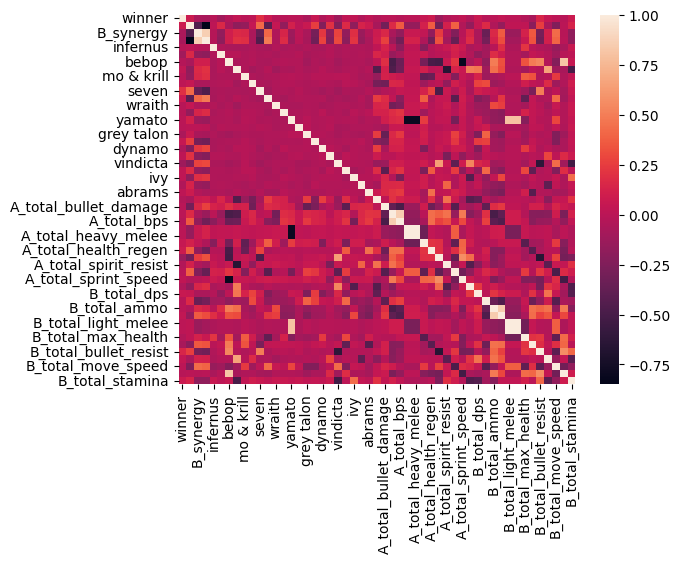

In [134]:
import seaborn as sns
sns.heatmap(df.corr())

In [135]:
df.isna().sum()

winner                   0
A_synergy                0
B_synergy                0
synergy_diff             0
infernus                 0
paradox                  0
bebop                    0
mcginnis                 0
mo & krill               0
kelvin                   0
seven                    0
haze                     0
wraith                   0
shiv                     0
yamato                   0
viscous                  0
grey talon               0
warden                   0
dynamo                   0
lash                     0
vindicta                 0
lady geist               0
ivy                      0
pocket                   0
abrams                   0
A_total_dps              0
A_total_bullet_damage    0
A_total_ammo             0
A_total_bps              0
A_total_light_melee      0
A_total_heavy_melee      0
A_total_max_health       0
A_total_health_regen     0
A_total_bullet_resist    0
A_total_spirit_resist    0
A_total_move_speed       0
A_total_sprint_speed     0
A

In [136]:
df.duplicated().sum()

0

In [137]:
df.columns

Index(['winner', 'A_synergy', 'B_synergy', 'synergy_diff', 'infernus',
       'paradox', 'bebop', 'mcginnis', 'mo & krill', 'kelvin', 'seven', 'haze',
       'wraith', 'shiv', 'yamato', 'viscous', 'grey talon', 'warden', 'dynamo',
       'lash', 'vindicta', 'lady geist', 'ivy', 'pocket', 'abrams',
       'A_total_dps', 'A_total_bullet_damage', 'A_total_ammo', 'A_total_bps',
       'A_total_light_melee', 'A_total_heavy_melee', 'A_total_max_health',
       'A_total_health_regen', 'A_total_bullet_resist',
       'A_total_spirit_resist', 'A_total_move_speed', 'A_total_sprint_speed',
       'A_total_stamina', 'B_total_dps', 'B_total_bullet_damage',
       'B_total_ammo', 'B_total_bps', 'B_total_light_melee',
       'B_total_heavy_melee', 'B_total_max_health', 'B_total_health_regen',
       'B_total_bullet_resist', 'B_total_spirit_resist', 'B_total_move_speed',
       'B_total_sprint_speed', 'B_total_stamina'],
      dtype='object')

In [138]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [139]:
X, y = df.drop('winner', axis=1), df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
X_train.shape, X_test.shape

((1837, 50), (788, 50))

In [140]:
RFC = RandomForestClassifier(n_estimators=250, max_depth=25)
RFC.fit(X_train, y_train)

y_pred_train = RFC.predict(X_train)
y_pred_test = RFC.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')


accuracy train: 1.0, accuracy test: 0.5697969543147208


In [141]:
GBC = GradientBoostingClassifier(n_estimators=250, max_depth=3)
GBC.fit(X_train, y_train)

y_pred_train = RFC.predict(X_train)
y_pred_test = RFC.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 1.0, accuracy test: 0.5697969543147208


In [142]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.6374523679912901, accuracy test: 0.5774111675126904


In [571]:
heroes_A = [input('enter amber heroes: ').lower() for _ in range(6)]
heroes_B = [input('enter sapphire heroes: ').lower() for _ in range(6)]

# kills_A = int(input('enter amber total kills: '))
# deaths_A = int(input('enter amber total deaths: '))
# assists_A = int(input('enter amber total assists: '))
# kills_B = int(input('enter sapphire total kills: '))
# deaths_B = int(input('enter sapphire total deaths: '))
# assists_B = int(input('enter sapphire total assists: '))
# souls_A = int(input('enter amber total souls: '))
# souls_B = int(input('enter sapphire total souls: '))

test_match = pd.DataFrame(df.iloc[0, :] * 0).T
test_match.drop('winner', axis=1, inplace=True)

for i in range(6):
    test_match[f'A_{heroes_A[i]}'] = 1
for i in range(6):
    test_match[f'B_{heroes_B[i]}'] = 1 

# test_match['A_souls'] = souls_A
# test_match['B_souls'] = souls_B
# test_match['A_KDA'] = (kills_A + assists_A) / deaths_A
# test_match['B_KDA'] = (kills_B + assists_B) / deaths_B

add_heroes_attributes(test_match, heroes, heroes_stats) 
test_match

,A_souls,B_souls,A_KDA,B_KDA,A_infernus,B_infernus,A_paradox,B_paradox,A_bebop,B_bebop,A_mcginnis,B_mcginnis,A_mo & krill,B_mo & krill,A_kelvin,B_kelvin,A_seven,B_seven,A_haze,B_haze,A_wraith,B_wraith,A_shiv,B_shiv,A_yamato,B_yamato,A_viscous,B_viscous,A_grey talon,B_grey talon,A_warden,B_warden,A_dynamo,B_dynamo,A_lash,B_lash,A_vindicta,B_vindicta,A_lady geist,B_lady geist,A_ivy,B_ivy,A_pocket,B_pocket,A_abrams,B_abrams,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,198850,186309,2.770833,2.096774,1,0.0,0.0,1,0.0,1,0.0,0.0,1,0.0,0.0,1,1,0.0,0.0,1,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,415.0,51.7,136.0,41.88,378.0,696.0,3575.0,12.5,8.0,0.0,41.3,0.0,19.0,386.0,49.28,207.0,47.21,378.0,696.0,3450.0,12.0,10.0,10.0,40.7,3.0,18.0


In [572]:
test_match_scaled = scaler.transform(test_match)
logreg.predict_proba(test_match_scaled)

array([[0.86327792, 0.13672208]])

In [573]:
logreg.predict(test_match_scaled)

array([0.])